# Educational Project: Traffic Signs 
---

## Setting the Enviroment.

 - Improting Libraries.

## Part 1: Dataset - Loading and Preprocessing.

### Task: Load the 'Traffic Signs' dataset and perform preprocessing procedures. 

#### Dataset Tasks:

 - Loading the Traffic Signs Dataset.
 - Extracting the Valid Features and Defining Label.
 - Analyzing Dataset Segments.
 - Preprocessing Images.
 - Data Augmentation.
---

## Part 2: leNet Neural Network Implementation.

### Task: Define leNet model and perform training procedures.

#### Building and Training Tasks:

 - Create leNet Model.
 - Compile the Model.
 - Create Model Callbacks.
 - Train the Model.
 - Save the Model
 ---

## Part 3: Analysis and Visualizing the Results.

### Task: Display the model predictions and perform analysis procedures.

#### Analyzing and Plotting Tasks:

 - Display Results.
 - Make Predictions.
 - Visualize the Predictions.
___

## Setting the Enviroment:

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import cv2
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import requests
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

## Part 1: Dataset - Loading and Preprocessing:
---


### Loading the Traffic Signs Dataset:

In [2]:
# Retrieving the Traffic Signs Dataset:

!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [3]:
# List all the files in the 'german-traffic-signs':

!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
# Introducing 'seed' for readily repetition of the results:

np.random.seed(0)

In [5]:
# Reading the files from the 'german-traffic-signs':

# Read the train file:
with open('german-traffic-signs/train.p', 'rb') as file:
  train_data = pickle.load(file)

# Read the valid file:
with open('german-traffic-signs/valid.p', 'rb') as file:
  val_data = pickle.load(file)

# Read the test file:
with open('german-traffic-signs/test.p', 'rb') as file:
  test_data = pickle.load(file)

### Extracting the Valid Features and Defining Label:

In [6]:
# Extracting the Features and Labes from all the dataset segments:

# Train dataset segment:
X_train, y_train = train_data['features'], train_data['labels']

# Validation dataset segment:
X_val, y_val = val_data['features'], val_data['labels']

# Train dataset segment:
X_test, y_test = test_data['features'], test_data['labels']

### Analyzing Dataset Segments:

In [7]:
# Printing the shape of the dataset segments:

print(X_train.shape, X_val.shape, X_test.shape)

(34799, 32, 32, 3) (4410, 32, 32, 3) (12630, 32, 32, 3)


In [8]:
# Whenever we import complex dataset from server it is good practive to verify that your dataset was imported correctly when the program is run:

# Train dataset segment:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"

# Validation dataset segment:
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"

# Test dataset segment:
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"

In [9]:
# Loading the 'signnames.csv' file into pandas dataframe:

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [10]:
# Storing the data['SignName'] in order to be used later for prediction purposes:

SignName_List = data['SignName'].to_numpy()

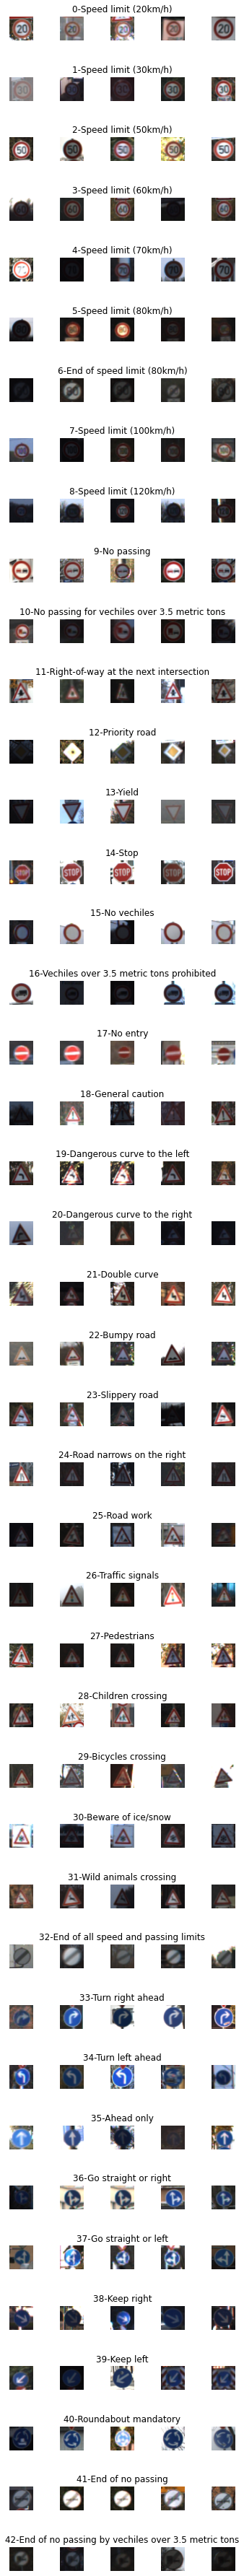

In [11]:
# Creating a grid with traffic signs images and signs names for better understanding the nature of the dataset:

# Creating the 'grid' code:
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j) + '-' + row['SignName'])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


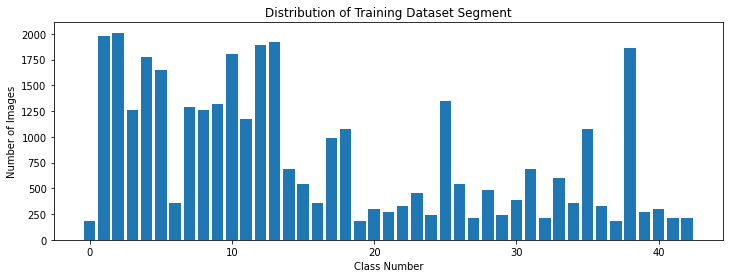

In [12]:
# Visualizing the distribution of the different classes in the Traffic Signs dataset:

# Print the number of samples:
print(num_of_samples)

# Visualize the distribution:
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of Training Dataset Segment')
plt.xlabel('Class Number')
plt.ylabel('Number of Images')
plt.show()

### Preprocessing Images:

(32, 32, 3)

36 --> Go straight or right


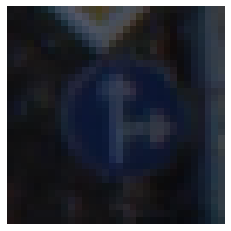

In [13]:
# Selecting an image for clear display of the preprocessing process:

# Selecting the 1000 index image of the X_train dataset segment:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print()
print(y_train[1000], '-->', data['SignName'][y_train[1000]])

In [14]:
# Greyscale Function:

def grayscale(image):
    
    """ Creating function that converts RGB image to Grey scale image 
         Parameters
         ----------
         image : array
             image is an array which contains pixels of the original dataset image
         
         Returns
         -------
         image : array
             image is modified version of the original image with three channels to new image with one channel     
    """
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

Display the modified image: 


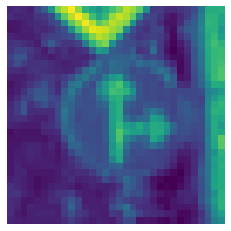

The shape of the modified image is:  (32, 32)


In [15]:
# Testing the 'greyscale' function:

# Utilizing the 'grayscale' function:
print('Display the modified image: ')
test_image = grayscale(X_train[1000])
plt.imshow(test_image)
plt.axis('off')
plt.show()

# Printing the shape of the modified image:
print('The shape of the modified image is: ', test_image.shape)

In [16]:
# Historgam Equalization Function:

def equalize(image):
    
    """ Creating function that standardize the lighting in all the image of the dataset 
         Parameters
         ----------
         image : array
             image is an array which contains pixels of image that has only one channel
         
         Returns
         -------
         image : array
             image is modified version of the one channel image with more even distribution in the pixels intensity     
    """
    
    image = cv2.equalizeHist(image)
    return image

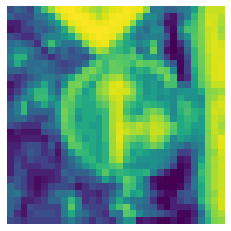

After appling the 'equlize' function the image has more contrast and clearly defined features!


In [17]:
# Testing the 'equalize' function:

# Utilizing the 'equalize' function:
test_image_ = equalize(test_image)
plt.imshow(test_image_)
plt.axis('off')
plt.show()

# Note:
print("After appling the 'equlize' function the image has more contrast and clearly defined features!")

In [18]:
# Image Preprocessing Function (Encapsulating all in one):

def image_preprocessing(image):
     
    """ Creating function with preprocessing techniques for image processing
         Parameters
         ----------
         image : array
             image is an array which contains pixels of the original dataset image
                 
         Returns
         -------
         image : array
             image is modified version of the original image         
    """    
    image = grayscale(image)
    image = equalize(image)
    image = image/255
    return image

In [19]:
# Preprocessing X-segments of the Traffic Sign Dataset (Updating it with the 'map' function utilizing the 'image preprocessing' function):

# Training dataset segment:
X_train = np.array(list(map(image_preprocessing, X_train)))

# Validation dataset segment:
X_val = np.array(list(map(image_preprocessing, X_val)))

# Test dataset segment:
X_test = np.array(list(map(image_preprocessing, X_test)))

The shape of the new X_train dataset segment is:  (34799, 32, 32)

Display a random modified image from the new X_train dataset segment: 


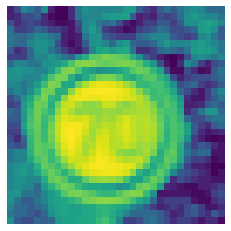

In [20]:
# Testing the results from the mapping process:

# Printing the shape of the modified image:
print('The shape of the new X_train dataset segment is: ', X_train.shape)
print()
print('Display a random modified image from the new X_train dataset segment: ')

# Displaying random images:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
plt.show()

In [21]:
# Reshaping the X-segmetns of the dataset as preprocessing step for proper input to the Neural Network:

# Training dataset segment:
X_train = X_train.reshape(34799, 32, 32, 1)

# Validation dataset segment:
X_test = X_test.reshape(12630, 32, 32, 1)

# Test dataset segment:
X_val = X_val.reshape(4410, 32, 32, 1)

In [22]:
# Checking the shape of the reshaped dataset segments:

print(X_train.shape, X_val.shape, X_test.shape)

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)


In [23]:
# One-hot enconding the y-segments of the Traffic Sign Dataset:

# Training dataset segment:
y_train = to_categorical(y_train, 43)

# Validation dataset segment:
y_val = to_categorical(y_val, 43)

# Test dataset segment:
y_test = to_categorical(y_test, 43)

### Data Augmentation:

In [24]:
# Introducing Data Augmentation in order to increase the variation of images and give the Neural Network different perspectives:

# Creating Data Generator:
data_gen = ImageDataGenerator(width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              zoom_range = 0.2,
                              shear_range = 0.1,
                              rotation_range = 10)

In [25]:
# Fitting the 'data_gen' Image Generator:

data_gen.fit(X_train)

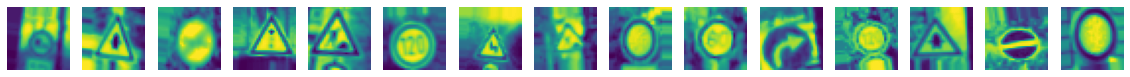

The X_batch shape is:  (15, 32, 32, 1)


In [26]:
# Testing the performance of the 'data_gen':

# Using the 'flow' function to load the image dataset in memory and generates batches of augmented data:
sample_batch = data_gen.flow(X_train, y_train, batch_size = 15)

# Unpack the 'sample_batch' into two segments:
X_batch, y_batch = next(sample_batch)

# Plotting the results:
fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')
plt.show()

# Display the X_batch shape:
print('The X_batch shape is: ', X_batch.shape)

## Part 2: leNet Neural Network Implementation:
---

### Create leNet Model:

In [27]:
# Creating the Sequential model object:
model = Sequential()

# Setting the first block of convolution, build from two layers:
model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
model.add(Conv2D(60, (5, 5), activation = 'relu'))

# Inserting first Maxpooling layer:
model.add(MaxPooling2D(pool_size = (2, 2)))

# Setting the second block of convolution, build from two layers:
model.add(Conv2D(30, (3, 3), activation = 'relu'))
model.add(Conv2D(30, (3, 3), activation = 'relu'))

# Inserting second Maxpooling layer:
model.add(MaxPooling2D(pool_size = (2, 2)))

# Inserting flatten layer:
model.add(Flatten())

# Setting the dense layer segment, build from two layers:
model.add(Dense(500, activation = 'relu'))

# Adding dropout layer:
model.add(Dropout(0.5))

# Setting the last dense layer: 
model.add(Dense(43, activation = 'softmax'))

# Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

### Compile the Model:

In [28]:
# Designation of optimizer:
opt_adam = Adam(learning_rate = 1e-4)

# Compile procedure:
model.compile(loss = 'categorical_crossentropy', optimizer = opt_adam, metrics = ['accuracy'])

### Create Model Callbacks:

In [29]:
# Setting the leNet model:

# Path of model save:
path = 'leNet.h5'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Earlystopping monitoring:
callback_2 = EarlyStopping(patience = 10, monitor = 'accuracy', mode = 'max')

# Connecting both in list:
callback_list = [callback_1, callback_2]

### Train the Model:

In [30]:
# Fitting the leNet model:
history = model.fit(data_gen.flow(X_train, y_train, batch_size = 50), 
                                  steps_per_epoch = 695,
                                  epochs = 100,
                                  validation_data = (X_val, y_val),
                                  callbacks = callback_list,
                                  verbose = 1,
                                  shuffle = 1)

# Information print:
print('Training Finished')

Epoch 1/100
695/695 [==============================] - 28s 19ms/step - loss: 3.3979 - accuracy: 0.1042 - val_loss: 1.7113 - val_accuracy: 0.5297

Epoch 00001: accuracy improved from -inf to 0.19641, saving model to leNet.h5
Epoch 2/100
695/695 [==============================] - 12s 18ms/step - loss: 2.0691 - accuracy: 0.4156 - val_loss: 1.0590 - val_accuracy: 0.7000

Epoch 00002: accuracy improved from 0.19641 to 0.45115, saving model to leNet.h5
Epoch 3/100
695/695 [==============================] - 12s 18ms/step - loss: 1.5389 - accuracy: 0.5421 - val_loss: 0.6986 - val_accuracy: 0.8023

Epoch 00003: accuracy improved from 0.45115 to 0.56410, saving model to leNet.h5
Epoch 4/100
695/695 [==============================] - 13s 18ms/step - loss: 1.2555 - accuracy: 0.6217 - val_loss: 0.5147 - val_accuracy: 0.8626

Epoch 00004: accuracy improved from 0.56410 to 0.63910, saving model to leNet.h5
Epoch 5/100
695/695 [==============================] - 12s 18ms/step - loss: 1.0700 - accuracy:

### Save the model:

In [31]:
# Loading the best model 'Nvidia.h5':

model_ = load_model('leNet.h5')

In [32]:
# Saving 'Nvidia.h5' model on local PC:

model_.save('leNet.h5')

## Part 3: Analysis and Visualizing the Results:
---

### Display Results:

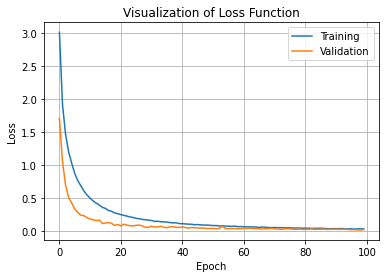

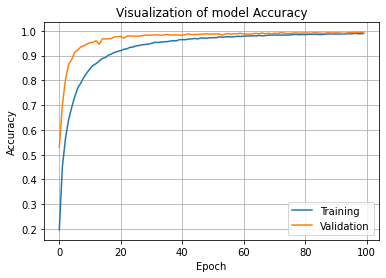

In [33]:
# Visualizing the learning curves on the leNet Neural Network:

# Displaying the Loss Function:
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')

plt.title('Visualization of Loss Function')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Displaying the model Accuracy:
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')

plt.title('Visualization of model Accuracy')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [34]:
# Evaluate the model on the test data:

# Using evaluvate mehhod for model evaluation:
score = model_.evaluate(X_test, y_test, verbose = 0)

# Printing the results:
print('Test Score:', round(score[0], 2))
print('Test Accuracy:', round(score[1], 2))

Test Score: 0.14
Test Accuracy: 0.97


### Make Predictions:

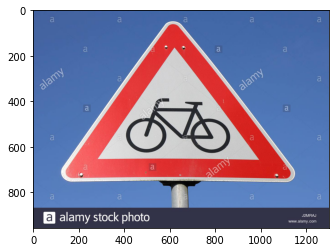

In [55]:
# Making predictions on completly new image:

# Selecting appropriate image from net:
url = "https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg"

# Making a request to retrieve data from a specified URL:
r = requests.get(url, stream = True)

# Opening the image in appropriate format:
image = Image.open(r.raw)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

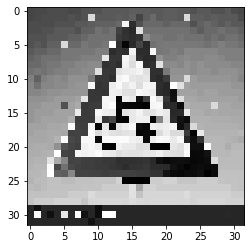

In [56]:
# Preprocessing the image in correct format as preparation for prediction:

# Set of functions applied on the new image as preprocessing procedures:
image_ = np.asarray(image)
image_ = cv2.resize(image_, (32, 32))
image_ = image_preprocessing(image_)
plt.imshow(image_, cmap = plt.get_cmap('gray'))
plt.show()

In [57]:
# Reshaping the image in the correct input_shape:

_image = image_.reshape(1, 32, 32, 1)

In [58]:
# Predicting the image content:

# Assign the result in variable:
prediction = np.argmax(model.predict(_image), axis = -1)

# Printing the results:
print('Predicted Sign: ', prediction[0])
print()

# Printing the prediction content:
for idx, val in enumerate(SignName_List):
   if idx == prediction[0]:
     print('Predicted Sign Content: ', val)

Predicted Sign:  24

Predicted Sign Content:  Road narrows on the right
